# 1. Vorbereitung und Datenimport

In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.rc('font', **{'family': 'Arial', 'size': 14})

In [4]:
grossstaedte = pd.read_csv("20240418-skba1-grossstaedte-deutschland-wikipedia.csv", sep = ";", header = [0, 1], decimal = ",")
grossstaedte.head()

Rang (2019)               Name Einwohnerzahl                             \
  Rang (2019)               Name          1939     1950     1960     1970   
0           1             Berlin       4321521  3336026  3274016  3208719   
1           2            Hamburg       1698388  1605606  1836958  1793640   
2           3            München        815212   831937  1101384  1311978   
3           4               Köln        768352   594941   801142   849451   
4           5  Frankfurt am Main        548220   532037   675009   666179   

                                                        Fläche in km² (2016)  \
      1980     1990     2000     2010     2018     2019 Fläche in km² (2016)   
0  3048759  3433695  3382169  3460725  3644826  3669491               891.68   
1  1645095  1652363  1715392  1786448  1841179  1847253               755.22   
2  1298941  1229026  1210223  1353186  1471508  1484226               310.70   
3   976694   953551   962884  1007119  1085664  1087863               405.02   
4   629375   644865   648550   679664   753056   763380               248.31   

  Ew./km² (2018) Großstadt erstmals           Bundesland  
  Ew./km² (2018) Großstadt erstmals           Bundesland  
0           4088               1747               Berlin  
1           2438               1787              Hamburg  
2           4736               1852               Bayern  
3           2681               1852  Nordrhein-Westfalen  
4           3033               1875               Hessen

In [5]:
neue_spalten = ['rang_2019', 'name', 'ew_1939', 'ew_1950', 'ew_1960', 'ew_1970', 'ew_1980', 'ew_1990', 'ew_2000', 'ew_2010', 'ew_2018', 'ew_2019', 'flaeche_qkm', 'ew_qkm', 'gs_erstmals', 'bundesland']
grossstaedte.columns = neue_spalten
grossstaedte.head()

,rang_2019,name,ew_1939,ew_1950,ew_1960,ew_1970,ew_1980,ew_1990,ew_2000,ew_2010,ew_2018,ew_2019,flaeche_qkm,ew_qkm,gs_erstmals,bundesland
0,1,Berlin,4321521,3336026,3274016,3208719,3048759,3433695,3382169,3460725,3644826,3669491,891.68,4088,1747,Berlin
1,2,Hamburg,1698388,1605606,1836958,1793640,1645095,1652363,1715392,1786448,1841179,1847253,755.22,2438,1787,Hamburg
2,3,München,815212,831937,1101384,1311978,1298941,1229026,1210223,1353186,1471508,1484226,310.70,4736,1852,Bayern
3,4,Köln,768352,594941,801142,849451,976694,953551,962884,1007119,1085664,1087863,405.02,2681,1852,Nordrhein-Westfalen
4,5,Frankfurt am Main,548220,532037,675009,666179,629375,644865,648550,679664,753056,763380,248.31,3033,1875,Hessen


In [6]:
print(grossstaedte.dtypes)

rang_2019        int64
name            object
ew_1939          int64
ew_1950          int64
ew_1960          int64
ew_1970          int64
ew_1980          int64
ew_1990          int64
ew_2000          int64
ew_2010          int64
ew_2018          int64
ew_2019          int64
flaeche_qkm    float64
ew_qkm           int64
gs_erstmals      int64
bundesland      object
dtype: object


In [7]:
print(grossstaedte["name"])

0                Berlin
1               Hamburg
2               München
3                  Köln
4     Frankfurt am Main
            ...        
76                Moers
77               Siegen
78           Hildesheim
79            Gütersloh
80       Kaiserslautern
Name: name, Length: 81, dtype: object


# 2. Scatter Plot (pyplot-API)

Text(245, 4390, 'München')

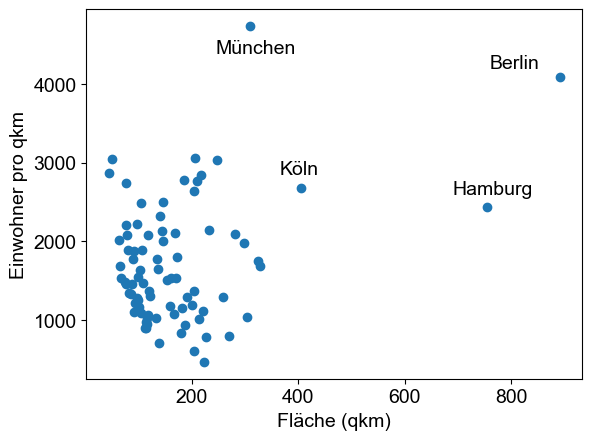

In [10]:
plt.scatter(grossstaedte["flaeche_qkm"].to_numpy(),grossstaedte["ew_qkm"].to_numpy())
plt.xlabel("Fläche (qkm)")
plt.ylabel("Einwohner pro qkm")
plt.annotate("Berlin", np.array([760, 4200]))
plt.annotate("Hamburg", np.array([690, 2600]))
plt.annotate("Köln", np.array([365, 2850]))
plt.annotate("München", np.array([245, 4390]))

# 3. Säulen- und Balkendiagramm (pyplot-API)

In [11]:
grosse_laender = ["Nordrhein-Westfalen", "Baden-Württemberg", "Bayern"]
no_gs_gl = grossstaedte["bundesland"][grossstaedte["bundesland"].isin(grosse_laender)].value_counts()
print(np.array(grosse_laender))
print(type(np.array(grosse_laender)))
print(no_gs_gl.to_numpy())
print(type(no_gs_gl.to_numpy()))

['Nordrhein-Westfalen' 'Baden-Württemberg' 'Bayern']
<class 'numpy.ndarray'>
[30  9  8]
<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Anzahl Großstädte nach Bundesländern (Säulendiagramm)')

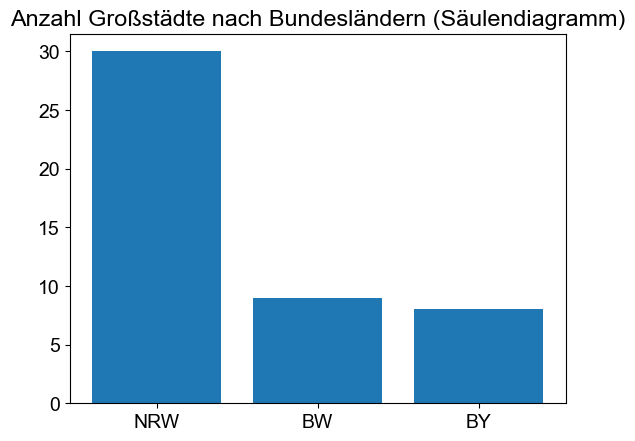

In [12]:
plt.bar(np.array(["NRW", "BW", "BY"]), no_gs_gl.to_numpy())
plt.title("Anzahl Großstädte nach Bundesländern (Säulendiagramm)")

Text(0.5, 1.0, 'Anzahl Großstädte nach Bundesländern (Balkendiagramm)')

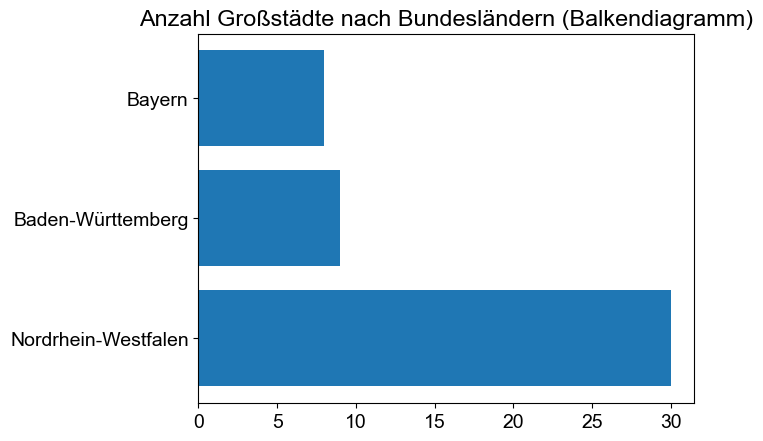

In [13]:
plt.barh(np.array(grosse_laender), no_gs_gl.to_numpy())
plt.title("Anzahl Großstädte nach Bundesländern (Balkendiagramm)")

# 4. Box Plot (pyplot-API)

Text(0.5, 0, 'Fläche (qkm)')

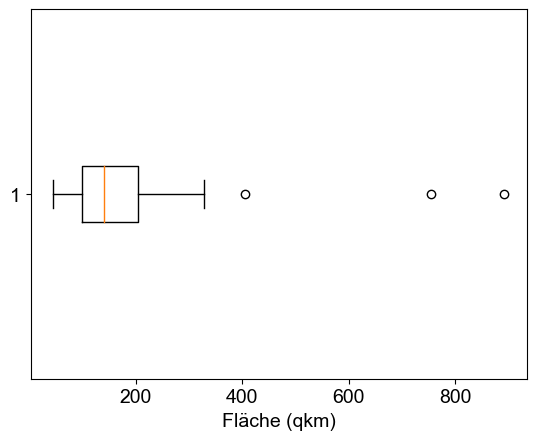

In [14]:
plt.boxplot(grossstaedte["flaeche_qkm"].to_numpy(), vert = False)
plt.xlabel("Fläche (qkm)")

# 5. Lorenzkurven (objektorientierte API)

In [15]:
def build_lc_data (raw_data):
    
    sorted_data = sorted(list(raw_data))
    
    x = [float(0)]

    for i in range(1, len(sorted_data) + 1):
        x.append(i / len(raw_data))

    normed_data = []
    nd_sum = sum(sorted_data)

    for i in range(0, len(sorted_data)):
        normed_data.append(sorted_data[i] / nd_sum)

    cumulative_normed_data = [normed_data[0]]

    for i in range(1, len(normed_data)):
        cumulative_normed_data.append(cumulative_normed_data[i-1] + normed_data[i])

    y = [float(0)] + cumulative_normed_data
    
    return(np.array([x, y]))

In [16]:
buli_1  = pd.read_csv("20240425-skba1-fussball-bl-2019-2020.csv", sep = ",", header = [0], decimal = ":")
buli_2  = pd.read_csv("20240425-skba1-fussball-bl2-2019-2020.csv", sep = ",", header = [0], decimal = ":")

In [17]:
buli_1.head()

,Pl.,Verein,Sp.,S,U,N,Tore,Diff.,Punkte
0,1.,FC Bayern München,34,26,4,4,100.32,+68,82
1,2.,Borussia Dortmund,34,21,6,7,84.41,+43,69
2,3.,RB Leipzig,34,18,12,4,81.37,+44,66
3,4.,Borussia Mönchengladbach,34,20,5,9,66.40,+26,65
4,5.,Bayer 04 Leverkusen,34,19,6,9,61.44,+17,63


In [18]:
buli_2.head()

,Pl.,Verein,Sp.,S,U,N,Tore,Diff.,Punkte
0,1.,Arminia Bielefeld,34,18,14,2,65.30,+35,68
1,2.,VfB Stuttgart,34,17,7,10,62.41,+21,58
2,3.,1. FC Heidenheim,34,15,10,9,45.36,+9,55
3,4.,Hamburger SV,34,14,12,8,62.46,+16,54
4,5.,SV Darmstadt 98,34,13,13,8,48.43,+5,52


In [19]:
print(buli_1.dtypes)

Pl.        object
Verein     object
Sp.         int64
S           int64
U           int64
N           int64
Tore      float64
Diff.      object
Punkte      int64
dtype: object


In [20]:
print(buli_2.dtypes)

Pl.        object
Verein     object
Sp.         int64
S           int64
U           int64
N           int64
Tore      float64
Diff.      object
Punkte      int64
dtype: object


In [21]:
build_lc_data(buli_1["Punkte"])

array([[0.        , 0.05555556, 0.11111111, 0.16666667, 0.22222222,
        0.27777778, 0.33333333, 0.38888889, 0.44444444, 0.5       ,
        0.55555556, 0.61111111, 0.66666667, 0.72222222, 0.77777778,
        0.83333333, 0.88888889, 0.94444444, 1.        ],
       [0.        , 0.02352941, 0.05882353, 0.09529412, 0.13764706,
        0.18      , 0.22352941, 0.26941176, 0.31764706, 0.36588235,
        0.41882353, 0.47529412, 0.53294118, 0.59411765, 0.66823529,
        0.74470588, 0.82235294, 0.90352941, 1.        ]])

In [22]:
lc_buli_1 = build_lc_data(buli_1["Punkte"])
lc_buli_2 = build_lc_data(buli_2["Punkte"])

Text(0.5, 1.0, '2. Bundesliga (2019/20)')

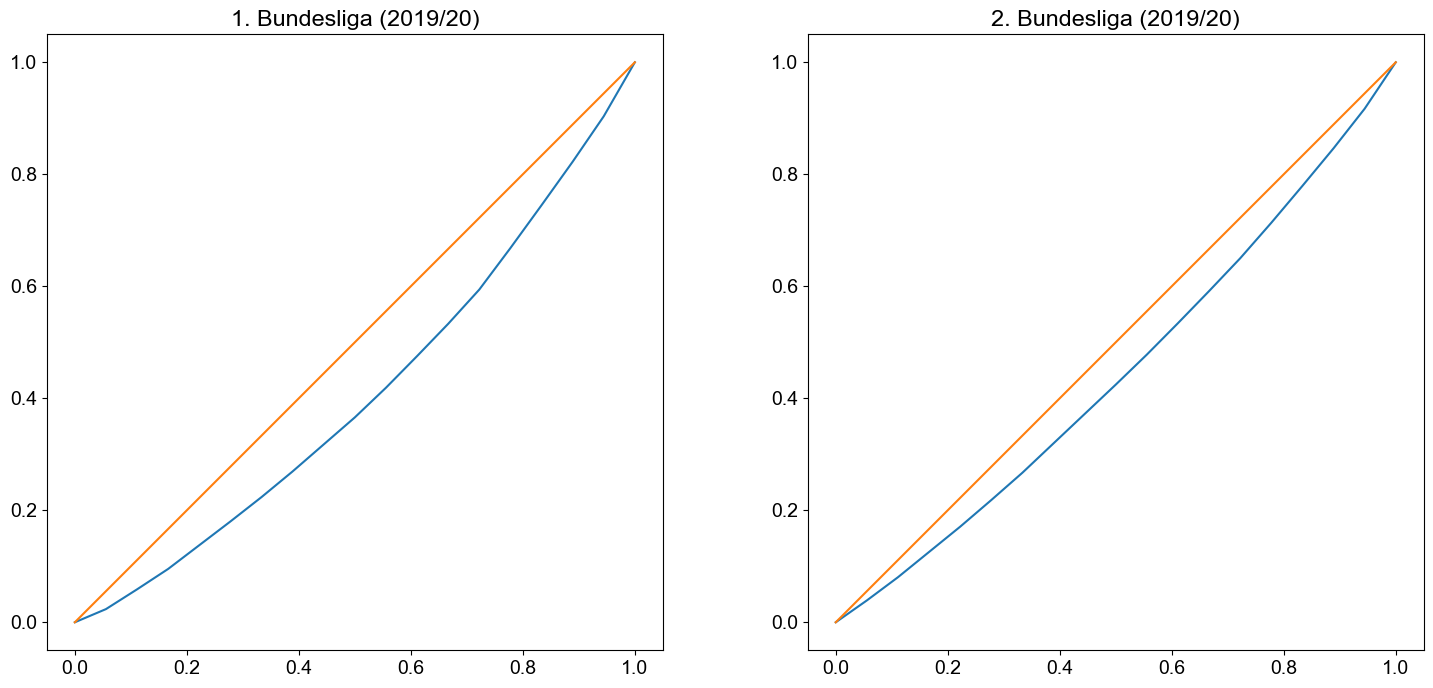

In [23]:
xy = np.array([0, 1])

fig, lc = plt.subplots(1, 2)

lc[0].set_aspect(aspect = 'equal')
lc[1].set_aspect(aspect = 'equal')

fig.set_size_inches(18, 8)

lc[0].plot(lc_buli_1[0], lc_buli_1[1])
lc[0].plot(xy, xy)

lc[1].plot(lc_buli_2[0], lc_buli_2[1])
lc[1].plot(xy, xy)

lc[0].set_title('1. Bundesliga (2019/20)')
lc[1].set_title('2. Bundesliga (2019/20)')